# Dependencies

In [67]:
import cv2
import os
os.environ["TF_USE_LEGACY_KERAS"] = "1"
from retinaface import RetinaFace
import matplotlib.pyplot as plt
import dlib
import numpy as np
import deepface as DeepFace
from deepface.basemodels import ArcFace
from deepface.modules import verification

# Picture import

In [48]:
# FUNKAR
image_path = 'own-pictures/testBildTruls.jpeg'
image_path_aligned = "own-pictures/testBildTrulsALIGNED.png"
img_cv2 = cv2.imread(image_path)

In [49]:
# FUNKAR
image_path = 'own-pictures/testBildTruls2.jpeg'
image_path_aligned = "own-pictures/testBildTruls2ALIGNED.png"
img_cv2 = cv2.imread(image_path)

In [53]:
# FUNKAR
image_path = 'own-pictures/testBildFurre.jpg'
image_path_aligned = "own-pictures/testBildFurreALIGNED.png"
img_cv2 = cv2.imread(image_path)

In [141]:
# FUNKAR
image_path = 'own-pictures/testBildTrulsRESIZE.jpeg'
image_path_aligned = "own-pictures/testBildTrulsALIGNEDRESIZE.png"
img_cv2 = cv2.imread(image_path)
#img_cv2.shape
#img_cv2_resize = cv2.resize(img_cv2, (112, 112), fx = 0.75, fy = 0.75, interpolation = cv2.INTER_AREA)
#img_cv2_resize.shape

In [142]:
# FUNKAR
image_path = 'faces/1_0_0_20161219140627985.jpg'
image_path_aligned = "own-pictures/BebisALIGNED.png"
img_cv2 = cv2.imread(image_path)
#img_cv2.shape
#img_cv2_resize = cv2.resize(img_cv2, (112, 112), fx = 0.75, fy = 0.75, interpolation = cv2.INTER_AREA)
#img_cv2_resize.shape

In [17]:
# FUNKAR
image_path = 'own-pictures/trulsSne.jpeg'
image_path_aligned = "own-pictures/trulsSneALIGNED.png"
img_cv2 = cv2.imread(image_path)

In [72]:
# FUNKAR, MEN DÅLIGT
image_path = 'own-pictures/profilKvinna1.png'
image_path_aligned = "own-pictures/profilKvinna1ALIGNED.png"
img_cv2 = cv2.imread(image_path)

In [28]:
# FUNKAR INTE
image_path = 'own-pictures/Jennifer.png'
image_path_aligned = "own-pictures/JenniferALIGNED.png"
img_cv2 = cv2.imread(image_path)

In [104]:
# FUNKAR, MEN DÅLIGT
image_path = 'own-pictures/Family1.png'
image_path_aligned = "own-pictures/Family1ALIGNED.png"
img_cv2 = cv2.imread(image_path)

# Detection

In [4]:
# UNCOMMENT THIS PART IF ALIGNMENT IS NOT TURNED ON
#det_faces = RetinaFace.detect_faces(img_path = image_path, threshold = 0.9)
#print(det_faces)

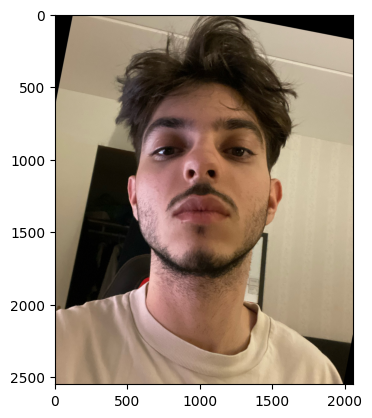

In [54]:
faces = RetinaFace.extract_faces(img_path = image_path, align = True, expand_face_area = 100)
cv2.imwrite(image_path_aligned, faces[0][:, : , ::-1])
plt.imshow(faces[0])
plt.show()

In [55]:
# UNCOMMENT THIS PART IF ALIGNMENT IS ON
det_faces = RetinaFace.detect_faces(img_path = image_path_aligned, threshold = 0.9)
print(det_faces)

{'face_1': {'score': 0.9998829364776611, 'facial_area': [526, 484, 1525, 1755], 'landmarks': {'right_eye': [785.78986, 884.2729], 'left_eye': [1283.249, 926.47266], 'nose': [1021.8772, 1000.2658], 'mouth_right': [813.5814, 1384.7755], 'mouth_left': [1203.5481, 1418.2635]}}}


# Alignment

In [25]:
# Done in detection section (for this time)
# Might use other more complicated alignment methods later

# Normalization

In [26]:
landmark_detector = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

face_area = det_faces["face_1"]["facial_area"]
face_area_tuple = dlib.rectangle(face_area[0], face_area[1], face_area[2], face_area[3])

img = faces[0]

landmarks = landmark_detector(img, face_area_tuple)

landmarks_tuple = []

base_img = img.copy()

for i in range(0,68):
    x = landmarks.part(i).x
    y = landmarks.part(i).y

    landmarks_tuple.append((x, y))

    cv2.circle(base_img, (x,y), 2, (255, 255, 255), -1)

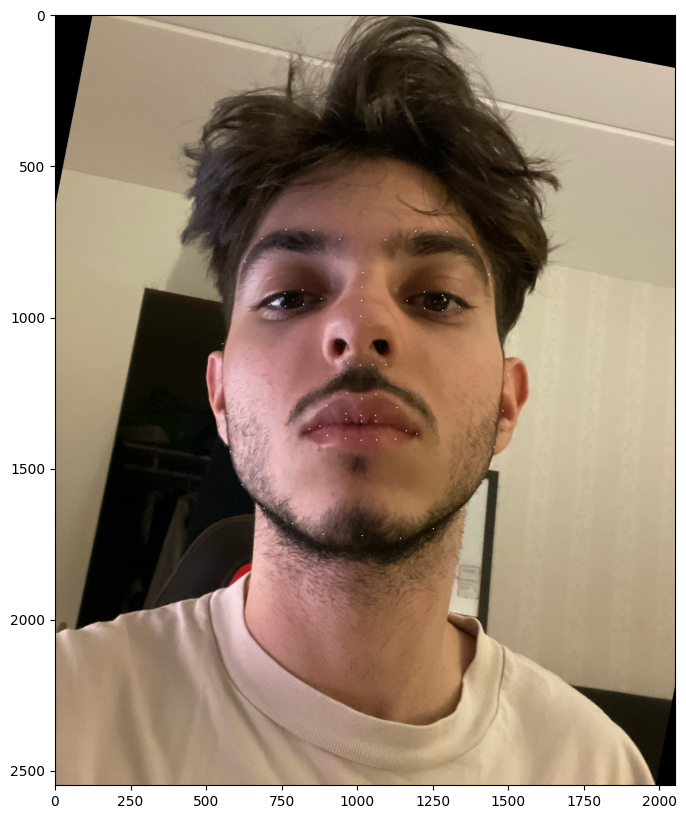

In [27]:
plt.figure(figsize = (10,10))
plt.imshow(base_img)

In [28]:
routes = [i for i in range(16, -1, -1)] + [i for i in range(17, 19)] + [i for i in range(24, 26)] + [16]
routes_coordinates = []

base_img = img.copy()
for i in range(0, len(routes) - 1):
    source_point = routes[i]
    target_point = routes[i+1]

    source_coordinate = landmarks_tuple[source_point]
    target_coordinate = landmarks_tuple[target_point]

    routes_coordinates.append(source_coordinate)

    cv2.line(base_img, source_coordinate, target_coordinate, (255, 255, 255), 2)

routes_coordinates = routes_coordinates + [routes_coordinates[0]]

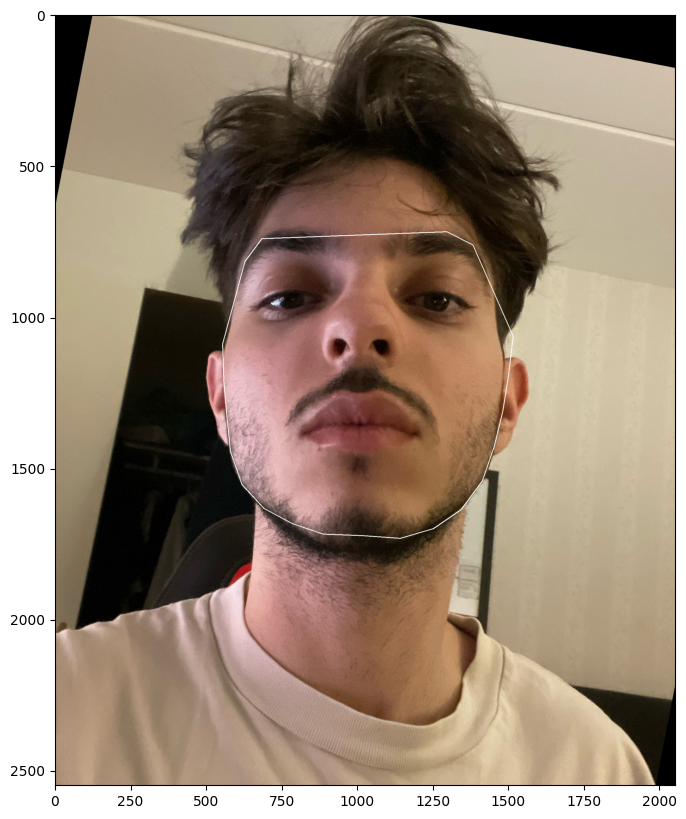

In [29]:
plt.figure(figsize = (10,10))
plt.imshow(base_img)

In [30]:
mask = np.zeros((img.shape[0], img.shape[1]))
mask = cv2.fillConvexPoly(mask, np.array(routes_coordinates), 1)
mask = mask.astype(bool)
out = np.zeros_like(img)
out[mask] = img[mask]

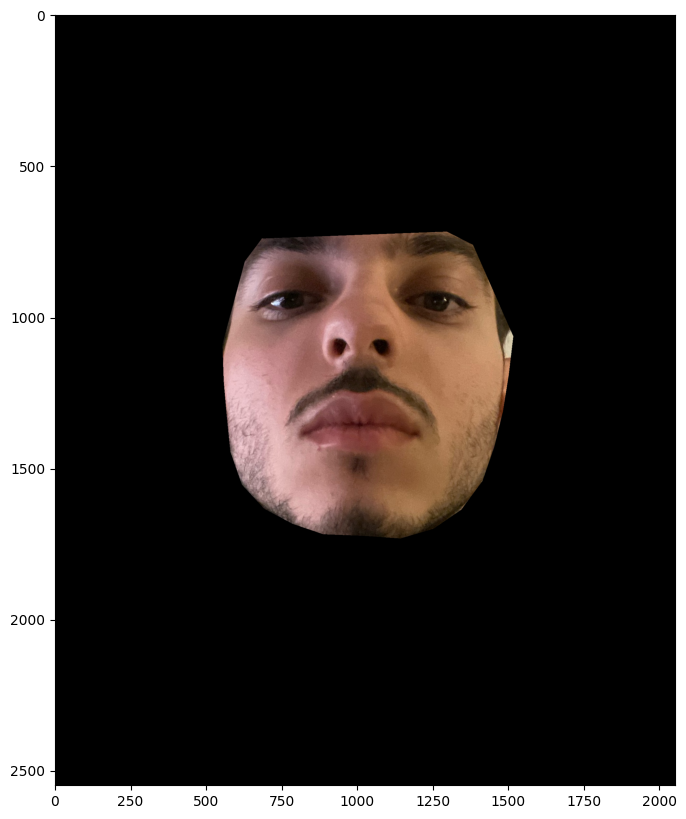

In [31]:
plt.figure(figsize = (10,10))
plt.imshow(out)

# Representation

In [32]:
# ArcFace (https://github.com/serengil/tensorflow-101/blob/master/python/ArcFace.ipynb)
model = ArcFace.load_model()

In [33]:
model.load_weights("arcface_weights.h5")

In [34]:
print("ArcFace expects ",model.layers[0].input_shape[1:]," inputs")
print("and it represents faces as ", model.layers[-1].output_shape[1:]," dimensional vectors")

ArcFace expects  []  inputs
and it represents faces as  (512,)  dimensional vectors


In [56]:
out_resize = cv2.resize(out, (112, 112))
img1_batch = np.expand_dims(out_resize, axis=0)
#img2_batch = np.expand_dims(out_resize, axis=0)
#print(out_resize.shape)
#print(img_batch.shape)

#img1_embedding = model.predict(img1_batch)[0]
#print(img1_embedding)

In [70]:
#metric = "cosine"
#metric = "euclidean"
metric = "euclidean_l2"

def findCosineDistance(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

def l2_normalize(x, axis=-1, epsilon=1e-10):
    output = x / np.sqrt(np.maximum(np.sum(np.square(x), axis=axis, keepdims=True), epsilon))
    return output	
    
def findEuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    #euclidean_distance = l2_normalize(euclidean_distance)
    return euclidean_distance

def findThreshold(metric):
    if metric == 'cosine':
        return 0.6871912959056619
    elif metric == 'euclidean':
        return 4.1591468986978075
    elif metric == 'euclidean_l2':
        return 1.1315718048269017

def verify(img1, img2):
    
    #representation
    
    img1_embedding = model.predict(img1)[0]
    img2_embedding = model.predict(img2)[0]

    if metric == 'cosine':
        distance = findCosineDistance(img1_embedding, img2_embedding)
    elif metric == 'euclidean':
        distance = findEuclideanDistance(img1_embedding, img2_embedding)
    elif metric == 'euclidean_l2':
        distance = findEuclideanDistance(l2_normalize(img1_embedding), l2_normalize(img2_embedding))
    
    #------------------------------
    #verification

    #threshold = verification.find_threshold("retinaface", metric)
    threshold = findThreshold(metric)
    
    if distance <= threshold:
        print("they are same person")
    else:
        print("they are different persons")
    
    print("Distance is ",round(distance, 2)," whereas as expected max threshold is ",round(threshold, 2))
    
    #------------------------------
    #display
    
    fig = plt.figure()
    
    ax1 = fig.add_subplot(1,2,1)
    plt.axis('off')
    plt.imshow(img1[0])#[:,:,::-1])
    
    ax2 = fig.add_subplot(1,2,2)
    plt.axis('off')
    plt.imshow(img2[0])#[:,:,::-1])
    
    plt.show()

# Verification

1/1 [==============================] - 0s 62ms/step
they are same person
Distance is  0.58  whereas as expected max threshold is  0.75


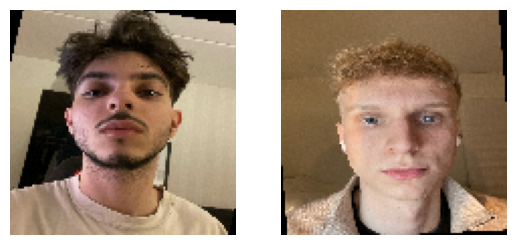

In [71]:
result = verify(img1_batch, img2_batch)